Aim: To forecast the average level of air pollution in India based on time series data

While forecasting the air pollution level, two models are used, which are ARIMA and seasonal ARIMA. While ARIMA succeeds in providing a preliminary prediction for the air pollution level, it does not consider the seasonal trend that is included in the air pollution data. Therefore, seasonal ARIMA model is used to make the forecast more precise. From the RMSE calculated in the training cases, it can be shown that seasonal ARIMA forecasts the data better than ARIMA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
data = pd.read_csv("C:/Users/18215/Desktop/Coding/India_Air_Quality/data.csv", encoding="ISO-8859-1")

In [3]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    y.plot(ax=ts_ax, legend=False)
    p_value = sm.tsa.stattools.adfuller(y.dropna())[1]
    ts_ax.set_title(f'Time Series Analysis Plots\nDickey-Fuller p-value = {p_value:.5f}')
    smt.graphics.plot_acf(y.dropna(), lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y.dropna(), lags=lags, ax=pacf_ax)
    plt.tight_layout()
    plt.show()

In [4]:
data = data.dropna(subset=["date"])
data["date"] = pd.to_datetime(data["date"])
data["year"] = data["date"].dt.year
data["year"] = data["year"].astype(int)
data["month"] = data["date"].dt.month
data["month"] = data["month"].astype(int)

SO2 Prediction

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\3418096679.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_so2 = data_so2.resample("M").mean().interpolate()


<Axes: xlabel='date'>

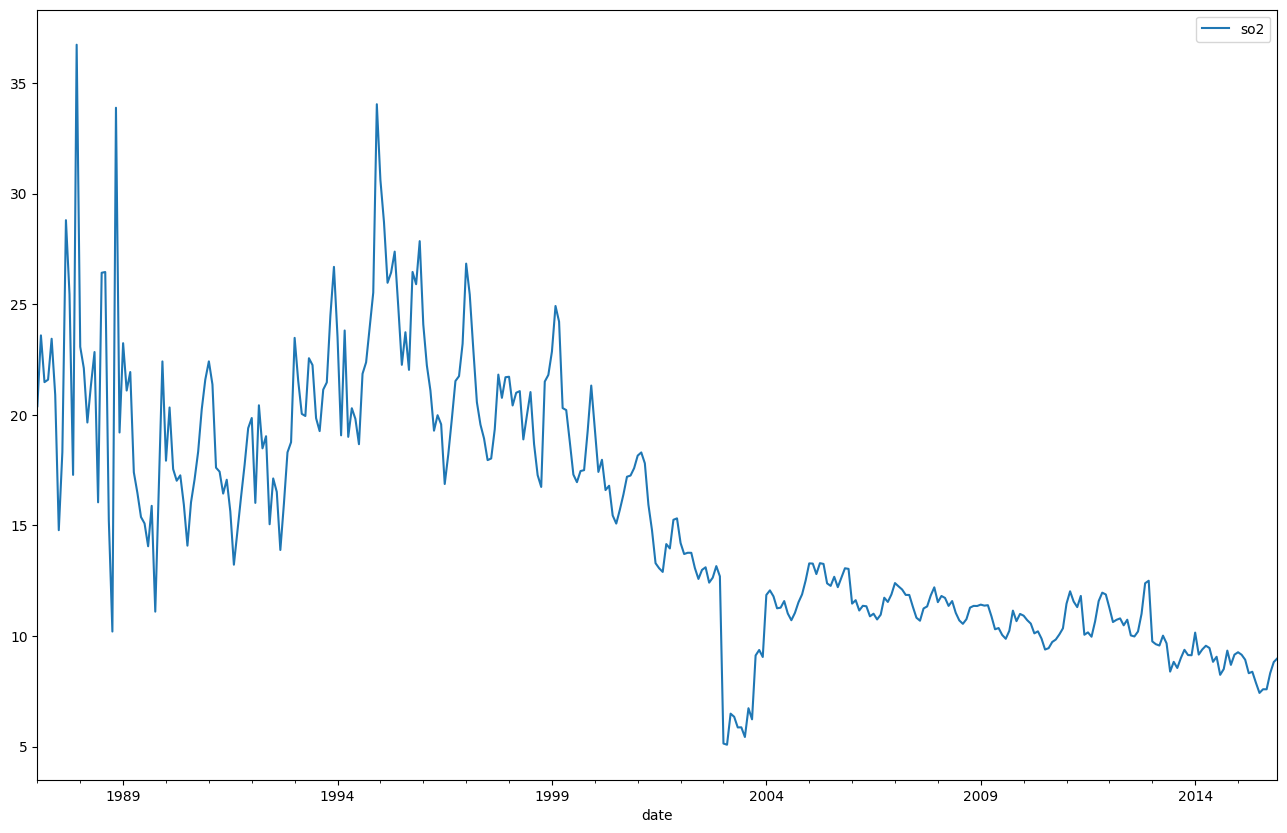

In [5]:
data_so2 = data[["date", "so2"]].set_index("date").dropna()
data_so2 = data_so2.resample("M").mean().interpolate()
data_so2.plot(figsize = (16, 10))

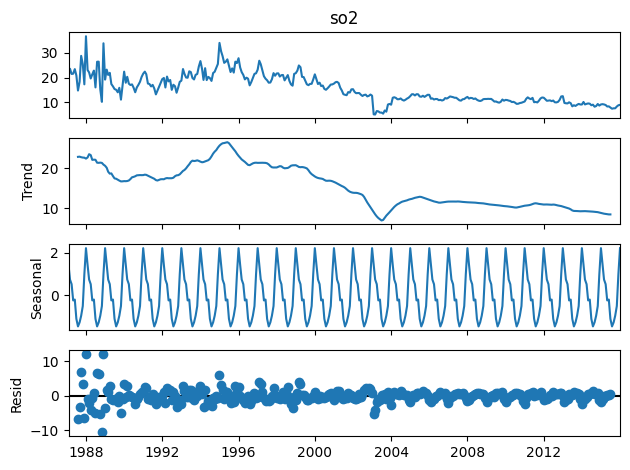

In [6]:
sm.tsa.seasonal_decompose(data_so2["so2"], period = 12).plot()
plt.show()

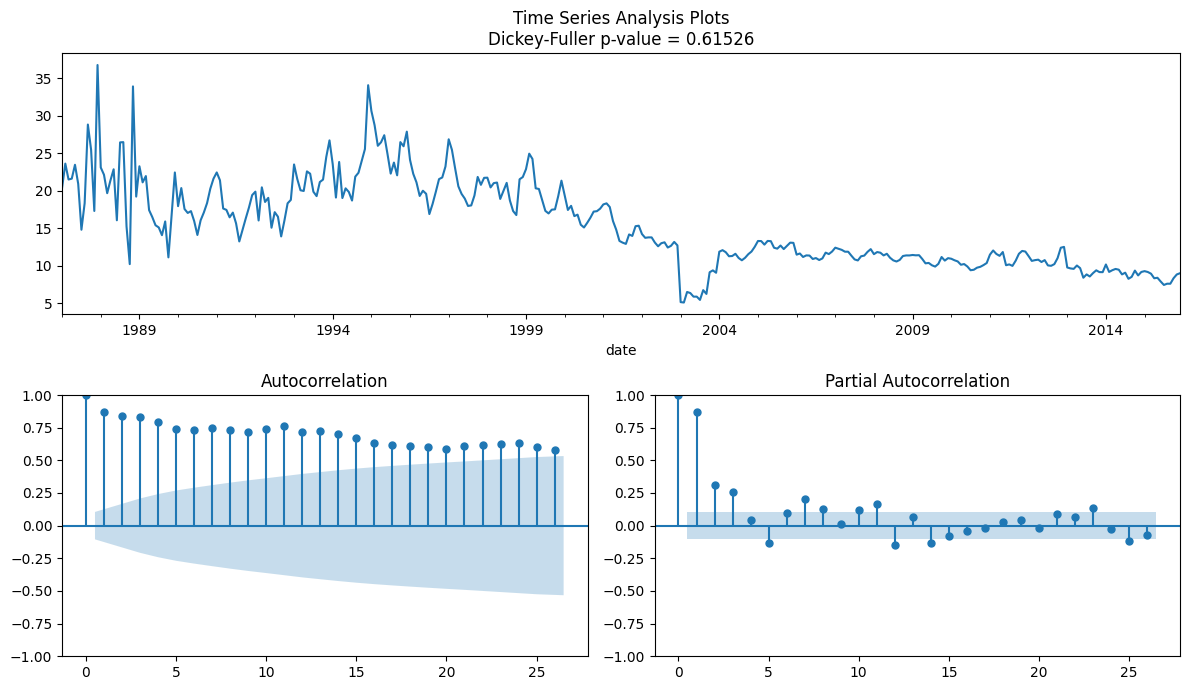

In [7]:
tsplot(data_so2["so2"])

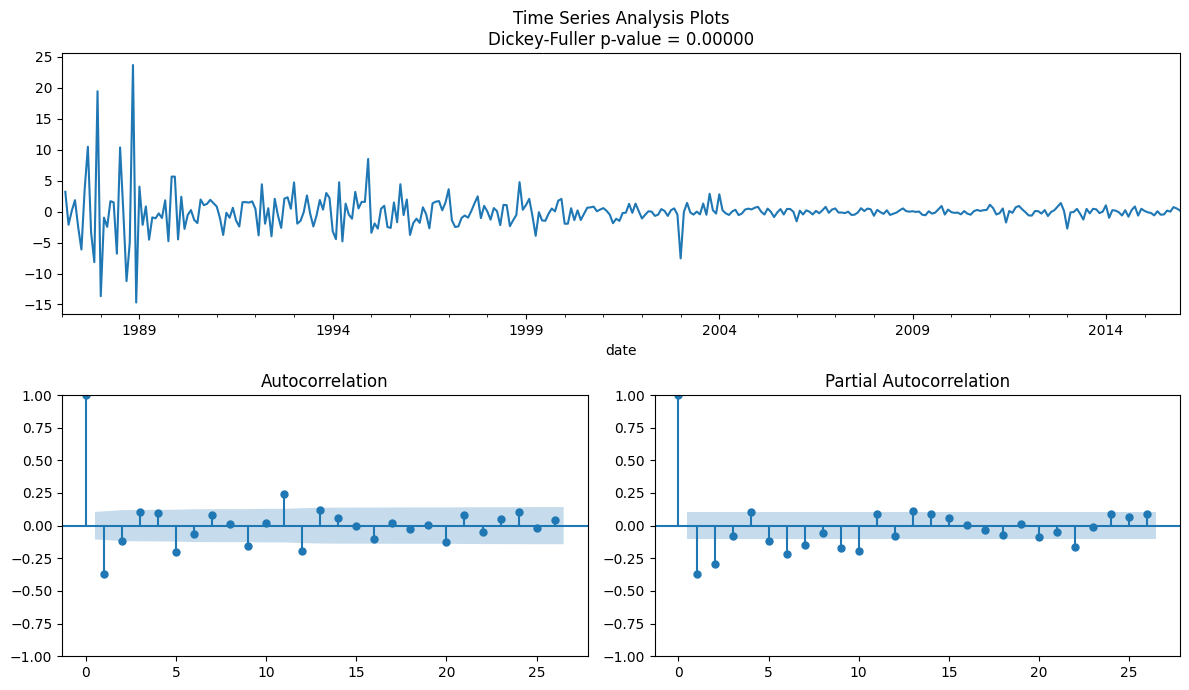

In [8]:
tsplot(data_so2["so2"].diff())

In [9]:
train = data_so2["so2"][:-30]
test = data_so2["so2"][-30:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\976661382.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 9.355013, expected = 8.829081
predicted = 9.379621, expected = 8.552750
predicted = 9.138793, expected = 9.001457
predicted = 9.240897, expected = 9.374168
predicted = 9.374150, expected = 9.136925
predicted = 9.259633, expected = 9.128811
predicted = 9.231809, expected = 10.150845
predicted = 9.704379, expected = 9.159081
predicted = 9.313384, expected = 9.391829
predicted = 9.395435, expected = 9.557004
predicted = 9.474186, expected = 9.456250
predicted = 9.441773, expected = 8.830638
predicted = 9.143775, expected = 9.059769
predicted = 9.193301, expected = 8.242843
predicted = 8.774503, expected = 8.504263
predicted = 8.797057, expected = 9.338051
predicted = 9.141530, expected = 8.693150
predicted = 8.869353, expected = 9.155388
predicted = 9.057470, expected = 9.263971
predicted = 9.128689, expected = 9.151181
predicted = 9.100674, expected = 8.925362
predicted = 9.001897, expected = 8.316158
predicted = 8.694189, expected = 8.381349
predicted = 8.652250, expected = 

In [10]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 0.4987


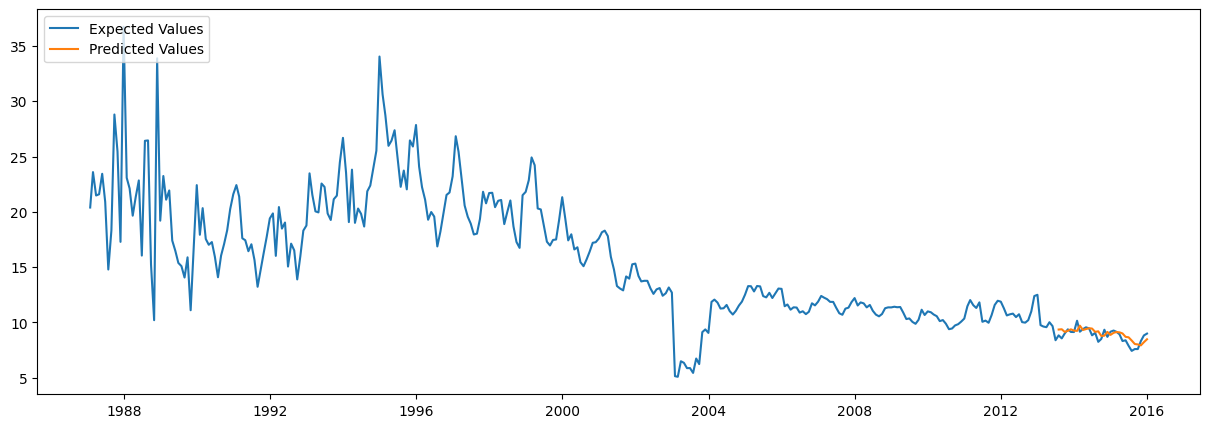

In [11]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data_so2['so2'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [12]:
future = [data_so2.index[-1] + DateOffset(months = x) for x in range(0, 49)]
df = pd.DataFrame(index = future[1:], columns = data_so2.columns)
forecast = pd.concat([data_so2, df])
forecast['ARIMA_Forecast'] = np.nan
forecast

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\3675486145.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([data_so2, df])


,so2,ARIMA_Forecast
1987-01-31,20.388571,NaN
1987-02-28,23.591176,NaN
1987-03-31,21.476596,NaN
1987-04-30,21.588235,NaN
1987-05-31,23.438462,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [13]:
history = [x for x in data_so2["so2"]]
f = []

for t in range(len(forecast) - len(data_so2)):
    
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    output = model_fit.forecast()[0]
    history.append(output)
    f.append(output) 

for i in range(len(f)):
    forecast.iloc[348 + i, 1] = f[i]

<Axes: >

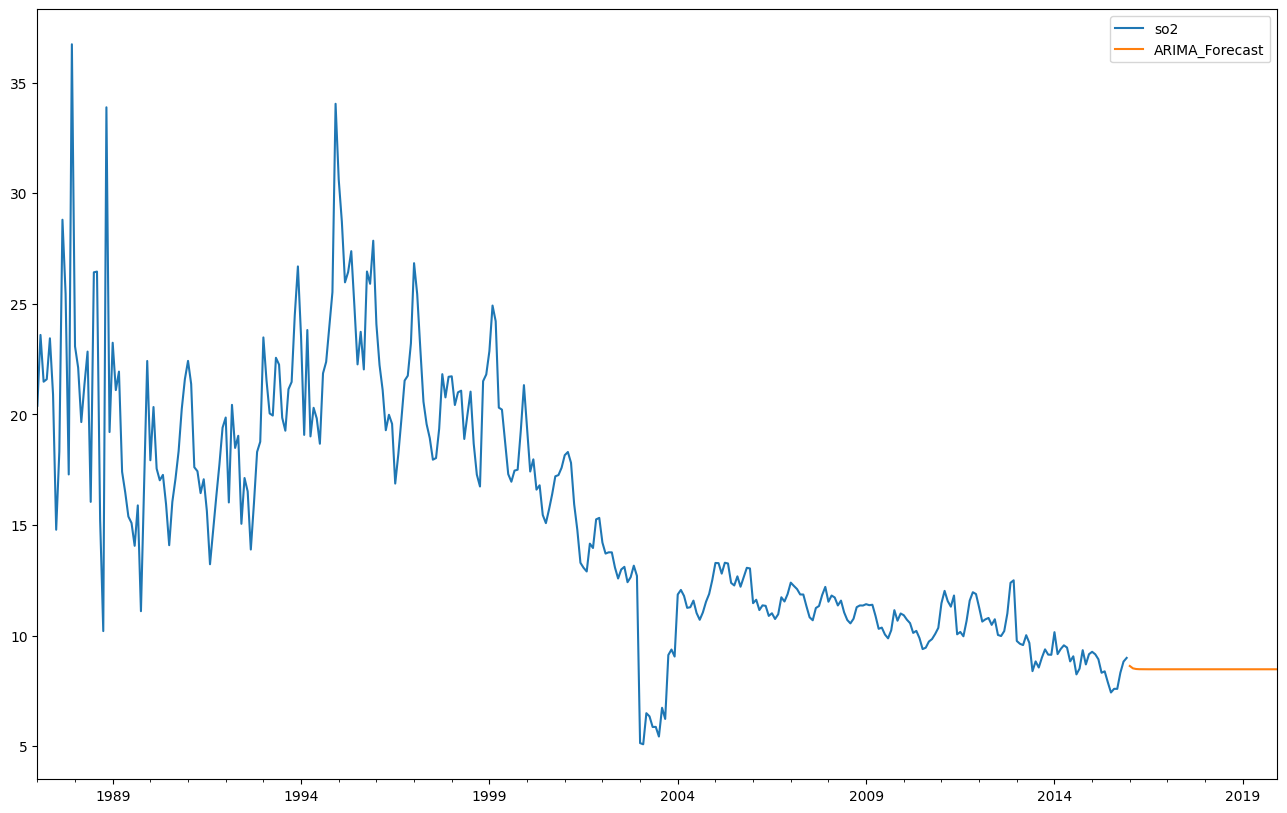

In [14]:
forecast[["so2", "ARIMA_Forecast"]].plot(figsize = (16, 10))

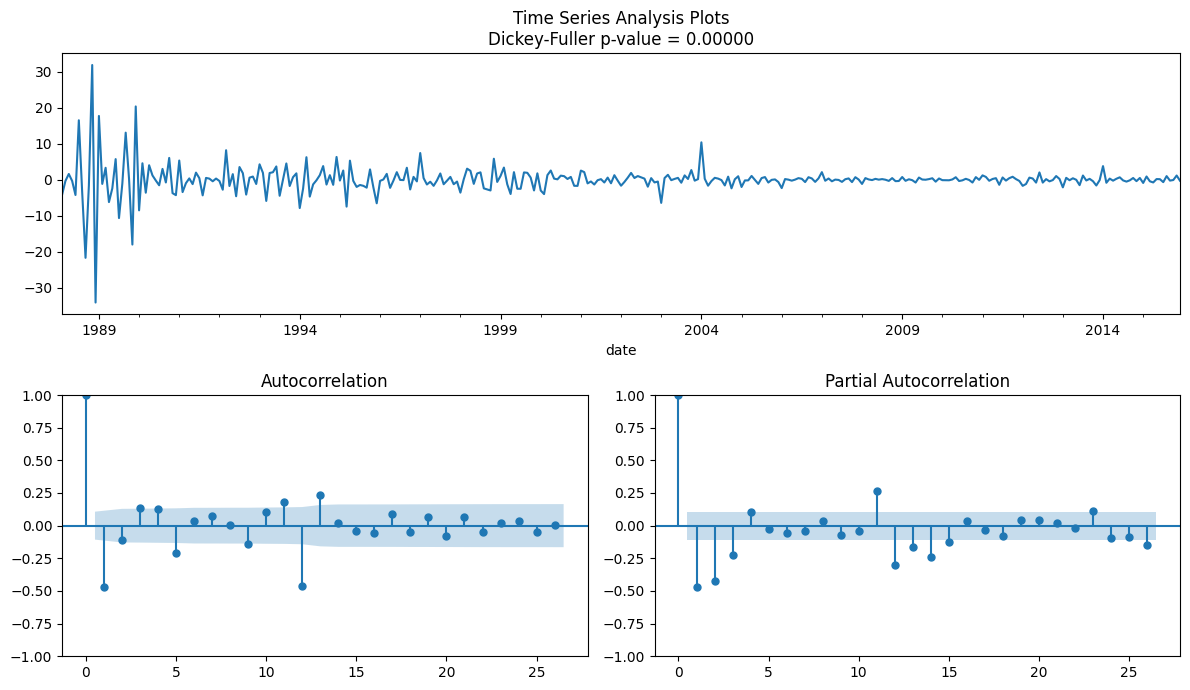

In [15]:
tsplot(data_so2["so2"].diff().diff(12).dropna())

In [16]:
model = sm.tsa.statespace.SARIMAX(data_so2["so2"], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                so2   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -762.738
Date:                            Wed, 30 Apr 2025   AIC                           1535.477
Time:                                    17:16:26   BIC                           1554.547
Sample:                                01-31-1987   HQIC                          1543.080
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0238      0.039     -0.603      0.546      -0.101       0.054
ma.L1         -0.6251      0.044   

In [17]:
train = data_so2["so2"][:-30]
test = data_so2["so2"][-30:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\2988534687.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 8.574904, expected = 8.829081
predicted = 8.605379, expected = 8.552750
predicted = 8.940456, expected = 9.001457
predicted = 9.569387, expected = 9.374168
predicted = 9.598587, expected = 9.136925
predicted = 9.666666, expected = 9.128811
predicted = 9.729070, expected = 10.150845
predicted = 9.761617, expected = 9.159081
predicted = 9.414667, expected = 9.391829
predicted = 9.001669, expected = 9.557004
predicted = 9.186048, expected = 9.456250
predicted = 8.927166, expected = 8.830638
predicted = 8.417143, expected = 9.059769
predicted = 8.627381, expected = 8.242843
predicted = 8.789117, expected = 8.504263
predicted = 9.400828, expected = 9.338051
predicted = 10.011844, expected = 8.693150
predicted = 9.773852, expected = 9.155388
predicted = 8.532140, expected = 9.263971
predicted = 8.802638, expected = 9.151181
predicted = 8.768376, expected = 8.925362
predicted = 8.664927, expected = 8.316158
predicted = 8.418957, expected = 8.381349
predicted = 7.730151, expected =

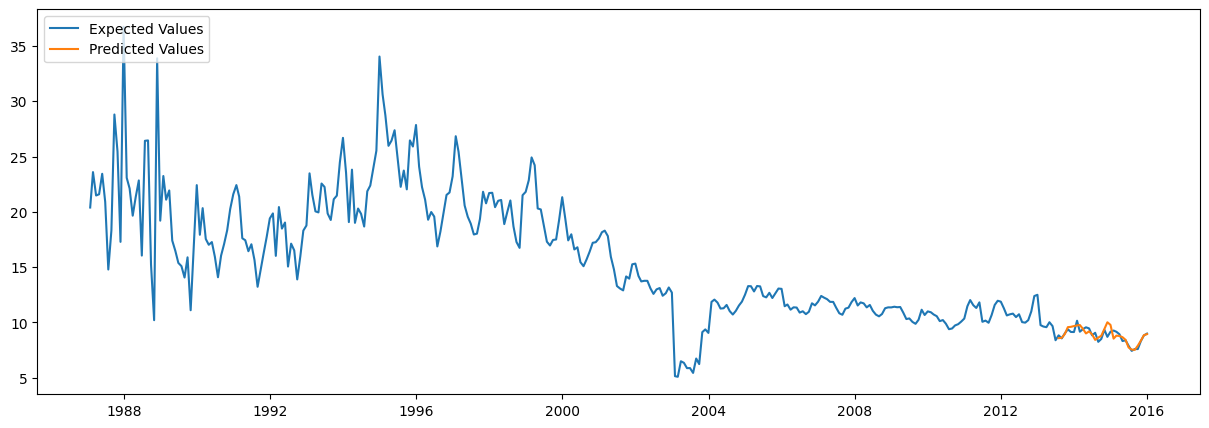

In [18]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data_so2['so2'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [19]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 0.4186


In [20]:
future = [data_so2.index[-1] + DateOffset(months = x) for x in range(0, 49)]
df = pd.DataFrame(index = future[1:], columns = data_so2.columns)
forecast = pd.concat([data_so2, df])
forecast['SARIMA_Forecast'] = np.nan
forecast

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\1067152827.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([data_so2, df])


,so2,SARIMA_Forecast
1987-01-31,20.388571,NaN
1987-02-28,23.591176,NaN
1987-03-31,21.476596,NaN
1987-04-30,21.588235,NaN
1987-05-31,23.438462,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [21]:
history = [x for x in data_so2["so2"]]
f = []

for t in range(len(forecast) - len(data_so2)):
    
    model = sm.tsa.statespace.SARIMAX(history, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
    model_fit = model.fit()
    
    output = model_fit.forecast()[0]
    history.append(output)
    f.append(output) 

for i in range(len(f)):
    forecast.iloc[348 + i, 1] = f[i]

<Axes: >

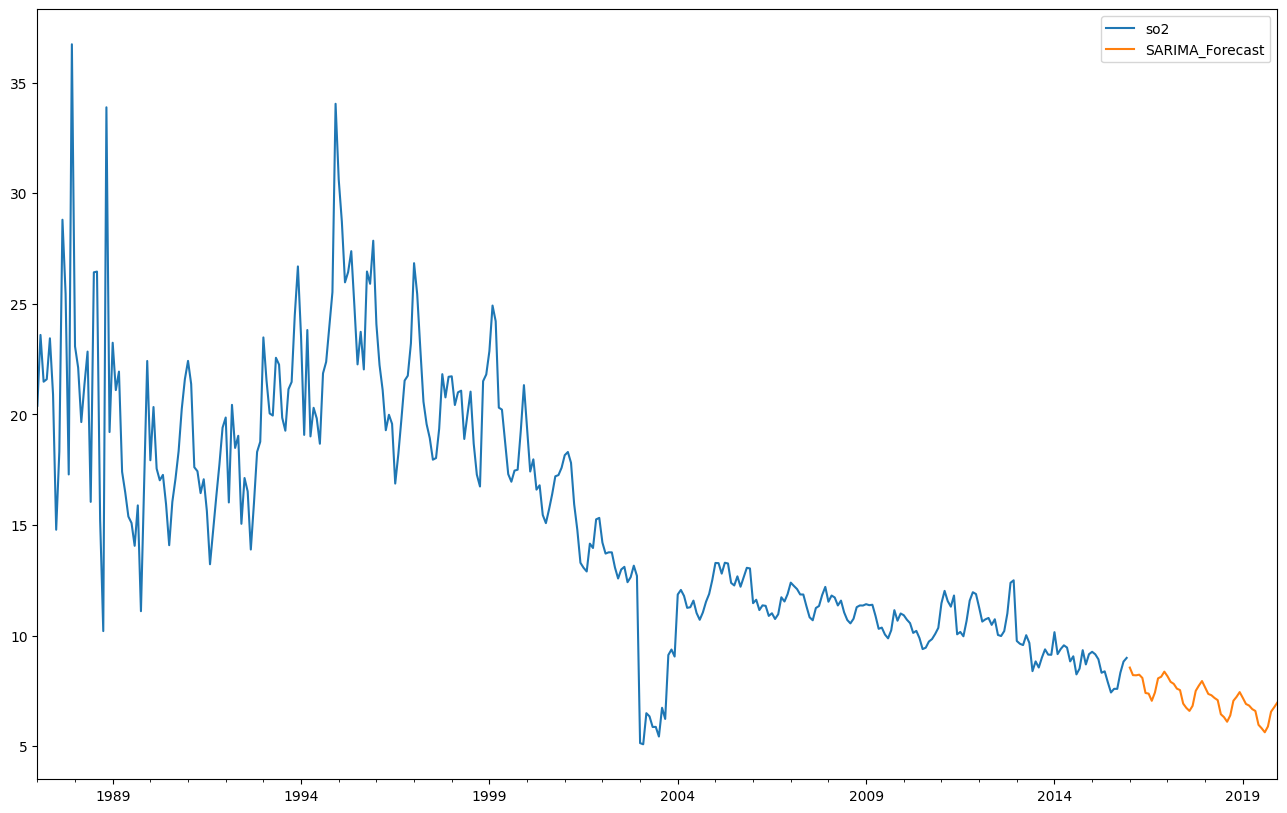

In [22]:
forecast[["so2", "SARIMA_Forecast"]].plot(figsize = (16, 10))

NO2 Prediction

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\828846949.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_no2 = data_no2.resample("M").mean().interpolate()


<Axes: xlabel='date'>

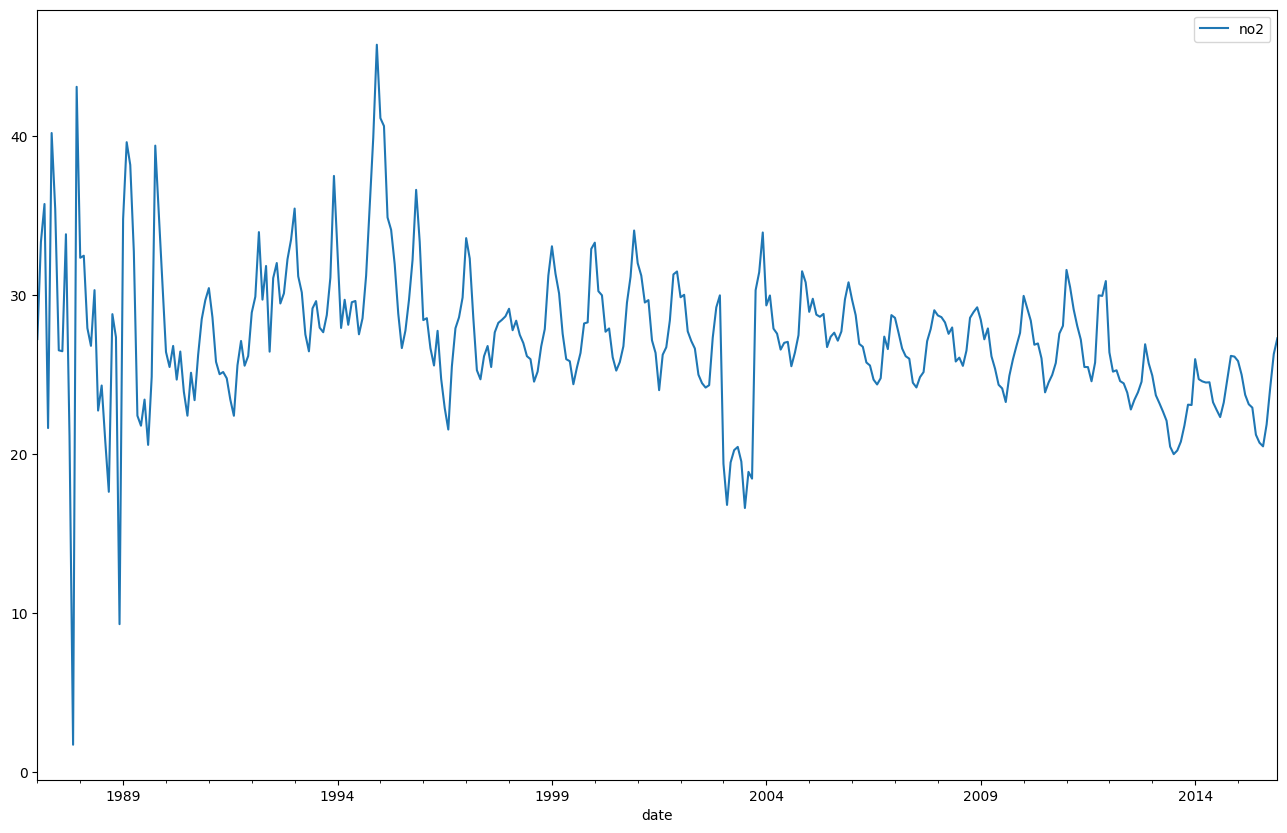

In [23]:
data_no2 = data[["date", "no2"]].set_index("date").dropna()
data_no2 = data_no2.resample("M").mean().interpolate()
data_no2.plot(figsize = (16, 10))

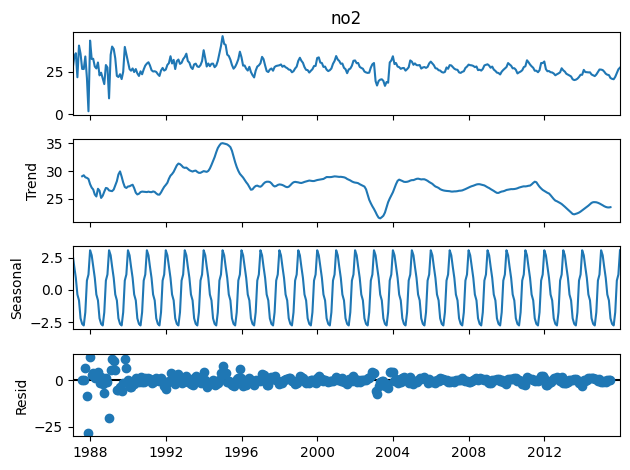

In [24]:
sm.tsa.seasonal_decompose(data_no2["no2"], period = 12).plot()
plt.show()

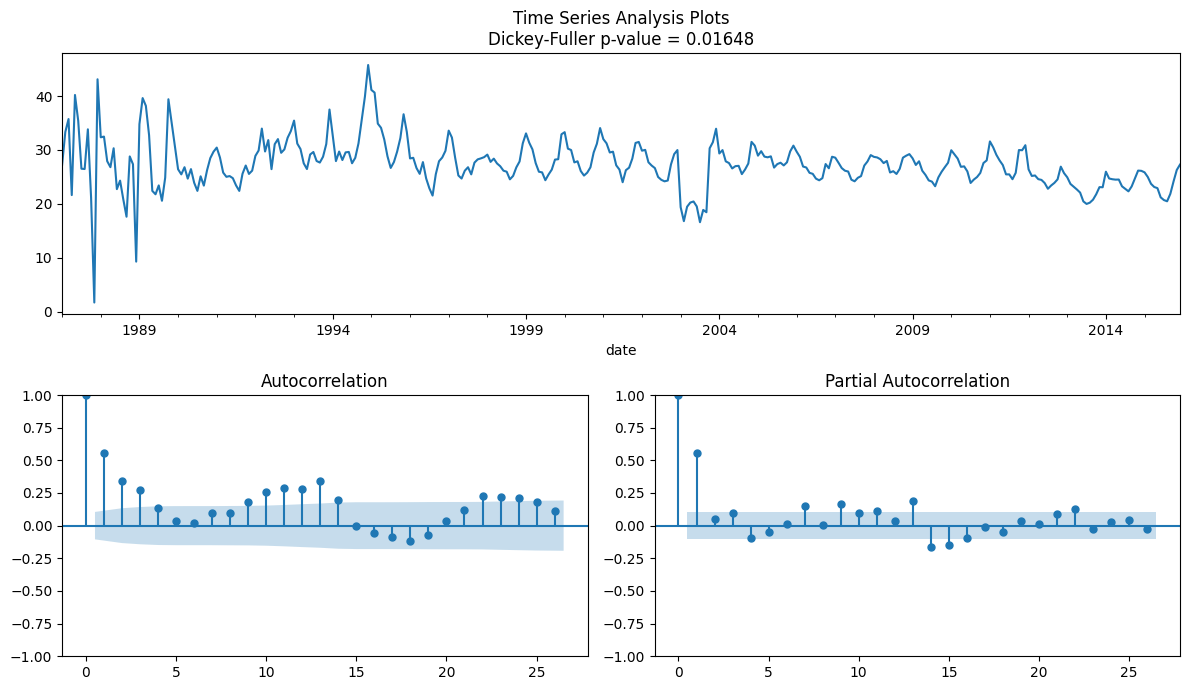

In [25]:
tsplot(data_no2["no2"])

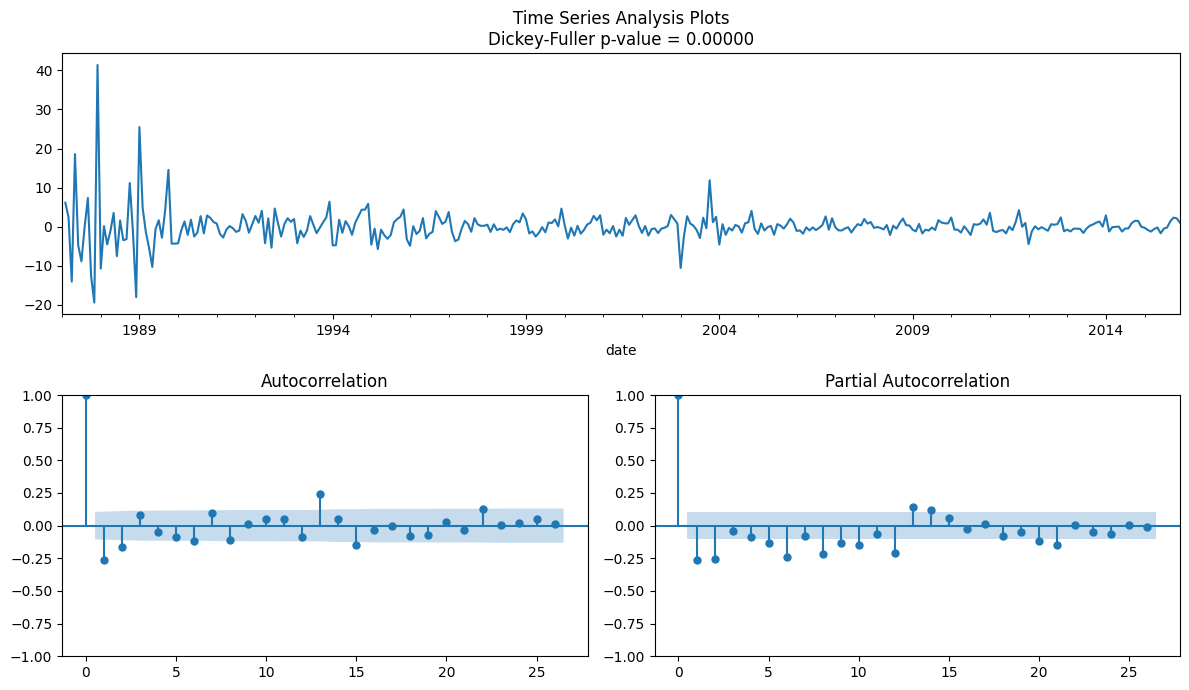

In [26]:
tsplot(data_no2["no2"].diff())

In [27]:
train = data_no2["no2"][:-30]
test = data_no2["no2"][-30:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\3770422533.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 23.330391, expected = 19.994539
predicted = 22.985657, expected = 20.224045
predicted = 22.992658, expected = 20.780291
predicted = 23.174869, expected = 21.798523
predicted = 23.613969, expected = 23.105995
predicted = 24.230664, expected = 23.085521
predicted = 24.169515, expected = 25.969222
predicted = 25.658333, expected = 24.712072
predicted = 25.002807, expected = 24.571548
predicted = 24.915636, expected = 24.498139
predicted = 24.862426, expected = 24.516015
predicted = 24.856850, expected = 23.258538
predicted = 24.177863, expected = 22.779774
predicted = 23.885794, expected = 22.326446
predicted = 23.597843, expected = 23.240152
predicted = 24.024756, expected = 24.717515
predicted = 24.771950, expected = 26.174636
predicted = 25.541650, expected = 26.129558
predicted = 25.545625, expected = 25.848670
predicted = 25.421958, expected = 24.990053
predicted = 24.987283, expected = 23.724537
predicted = 24.323780, expected = 23.132132
predicted = 23.990737, expected 

In [28]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 1.5497


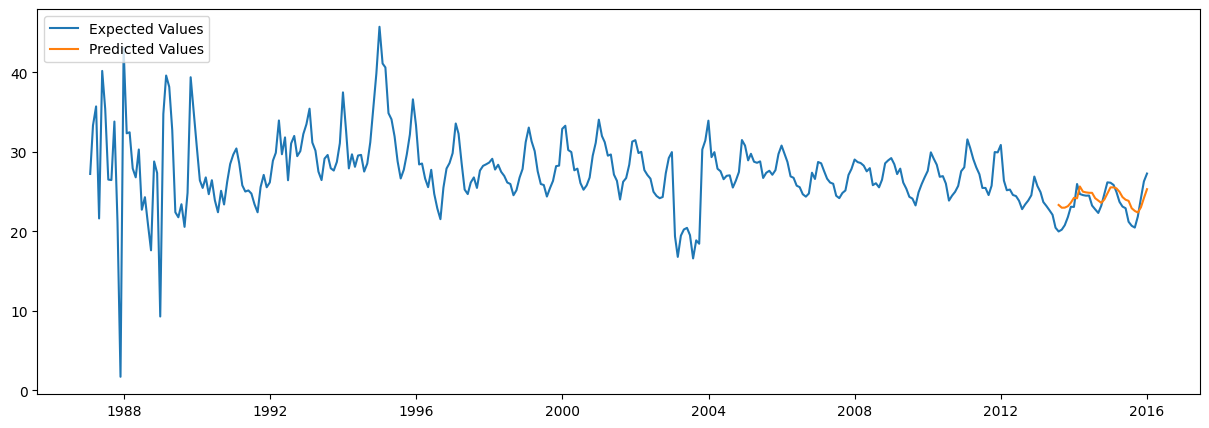

In [29]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data_no2['no2'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [30]:
future = [data_no2.index[-1] + DateOffset(months = x) for x in range(0, 49)]
df = pd.DataFrame(index = future[1:], columns = data_no2.columns)
forecast = pd.concat([data_no2, df])
forecast['ARIMA_Forecast'] = np.nan
forecast

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\1934086671.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([data_no2, df])


,no2,ARIMA_Forecast
1987-01-31,27.232407,NaN
1987-02-28,33.341509,NaN
1987-03-31,35.728000,NaN
1987-04-30,21.635294,NaN
1987-05-31,40.192857,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [31]:
history = [x for x in data_no2["no2"]]
f = []

for t in range(len(forecast) - len(data_no2)):
    
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    
    output = model_fit.forecast()[0]
    history.append(output)
    f.append(output) 

for i in range(len(f)):
    forecast.iloc[348 + i, 1] = f[i]

<Axes: >

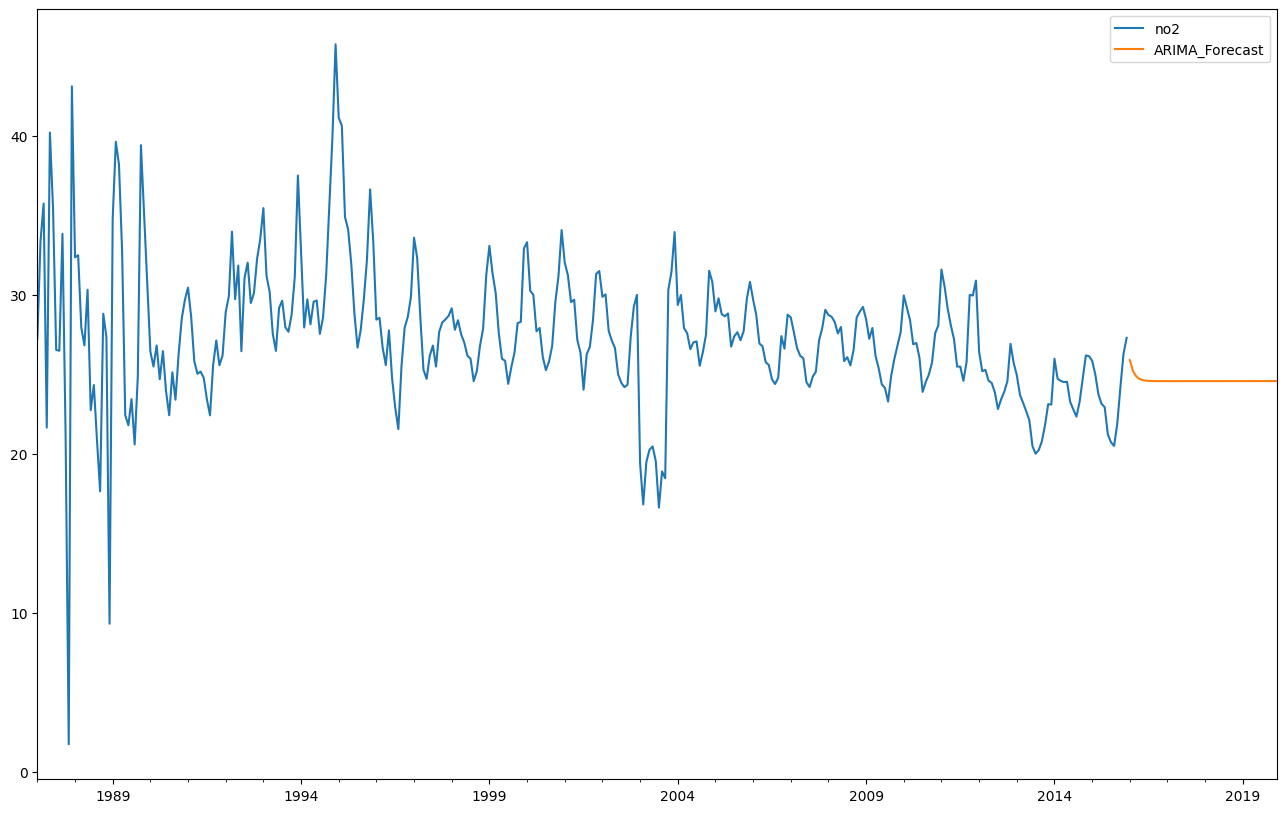

In [32]:
forecast[["no2", "ARIMA_Forecast"]].plot(figsize = (16, 10))

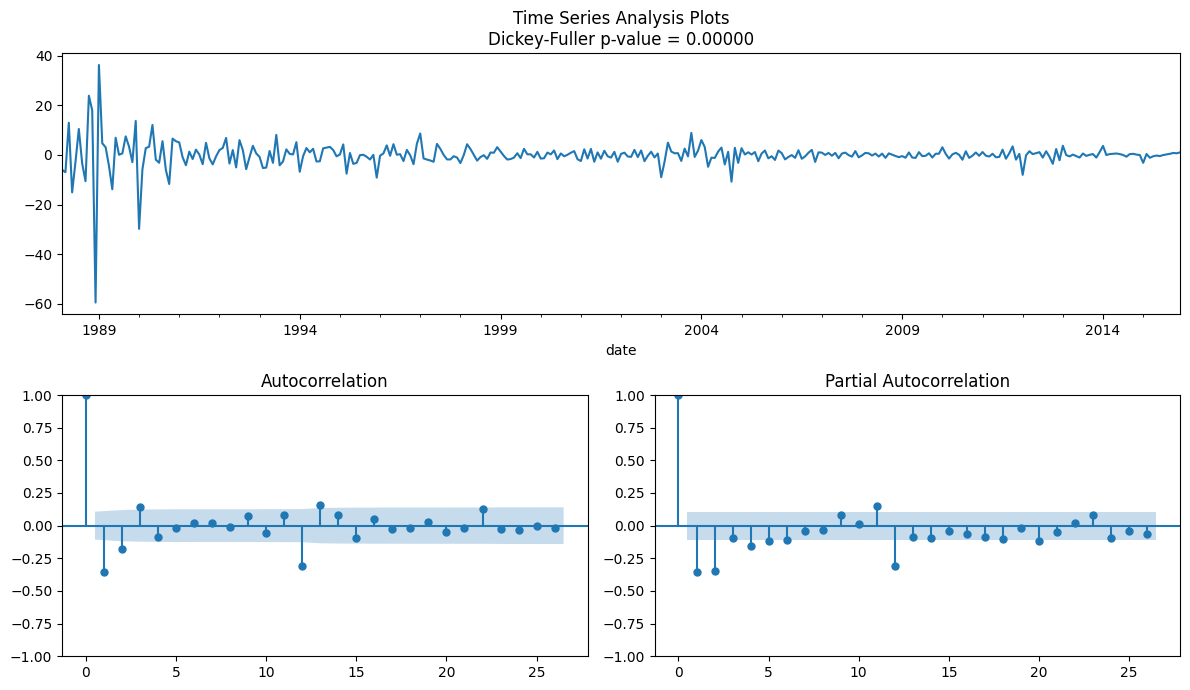

In [33]:
tsplot(data_no2["no2"].diff().diff(12).dropna())

In [34]:
model = sm.tsa.statespace.SARIMAX(data_no2["no2"], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                no2   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -910.140
Date:                            Wed, 30 Apr 2025   AIC                           1830.281
Time:                                    17:16:55   BIC                           1849.351
Sample:                                01-31-1987   HQIC                          1837.883
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3187      0.035      9.198      0.000       0.251       0.387
ma.L1         -0.8946      0.036   

In [35]:
train = data_no2["no2"][:-30]
test = data_no2["no2"][-30:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\1001327647.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 20.845687, expected = 19.994539
predicted = 20.578211, expected = 20.224045
predicted = 21.686399, expected = 20.780291
predicted = 24.389178, expected = 21.798523
predicted = 23.829939, expected = 23.105995
predicted = 26.113308, expected = 23.085521
predicted = 24.409402, expected = 25.969222
predicted = 25.090783, expected = 24.712072
predicted = 23.992078, expected = 24.571548
predicted = 22.516691, expected = 24.498139
predicted = 23.406658, expected = 24.516015
predicted = 22.135638, expected = 23.258538
predicted = 21.518150, expected = 22.779774
predicted = 21.609715, expected = 22.326446
predicted = 22.549899, expected = 23.240152
predicted = 25.382435, expected = 24.717515
predicted = 25.479912, expected = 26.174636
predicted = 27.563490, expected = 26.129558
predicted = 25.692583, expected = 25.848670
predicted = 25.320841, expected = 24.990053
predicted = 24.341989, expected = 23.724537
predicted = 22.428363, expected = 23.132132
predicted = 22.865577, expected 

In [36]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 1.1079


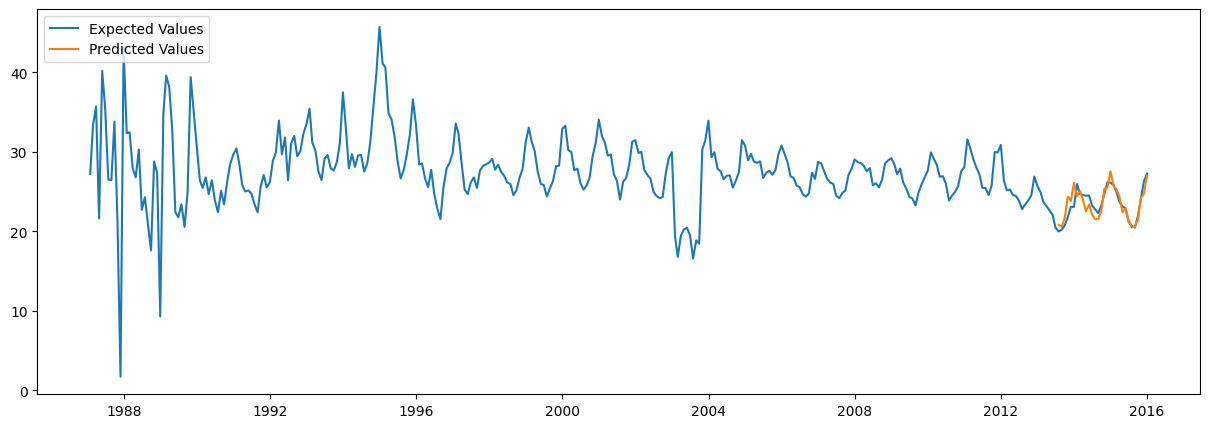

In [37]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data_no2['no2'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [38]:
future = [data_no2.index[-1] + DateOffset(months = x) for x in range(0, 49)]
df = pd.DataFrame(index = future[1:], columns = data_no2.columns)
forecast = pd.concat([data_no2, df])
forecast['SARIMA_Forecast'] = np.nan
forecast

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\3525965211.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([data_no2, df])


,no2,SARIMA_Forecast
1987-01-31,27.232407,NaN
1987-02-28,33.341509,NaN
1987-03-31,35.728000,NaN
1987-04-30,21.635294,NaN
1987-05-31,40.192857,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [39]:
history = [x for x in data_no2["no2"]]
f = []

for t in range(len(forecast) - len(data_no2)):
    
    model = sm.tsa.statespace.SARIMAX(history, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
    model_fit = model.fit()
    
    output = model_fit.forecast()[0]
    history.append(output)
    f.append(output) 

for i in range(len(f)):
    forecast.iloc[348 + i, 1] = f[i]

<Axes: >

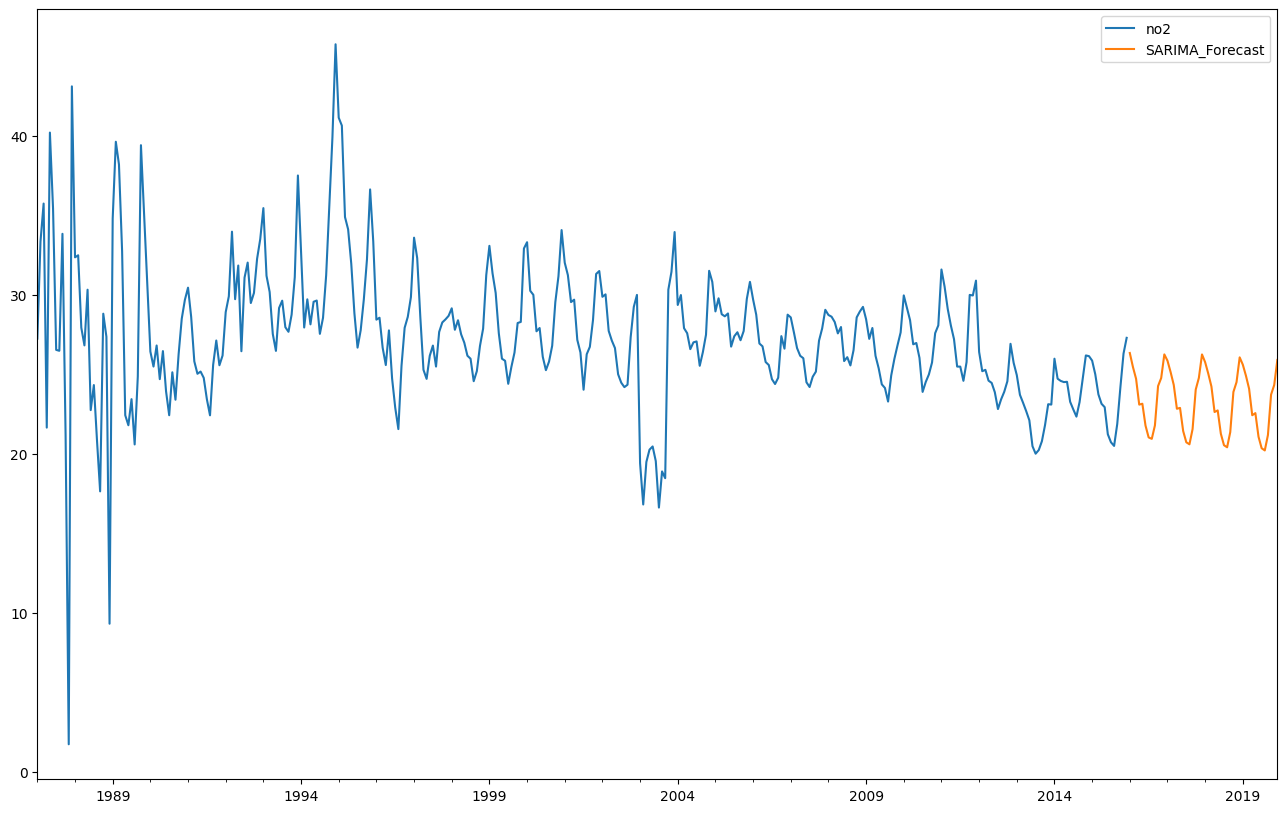

In [40]:
forecast[["no2", "SARIMA_Forecast"]].plot(figsize = (16, 10))

RSPM Prediction

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\4083620240.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_rspm = data_rspm.resample("M").mean().interpolate()


<Axes: xlabel='date'>

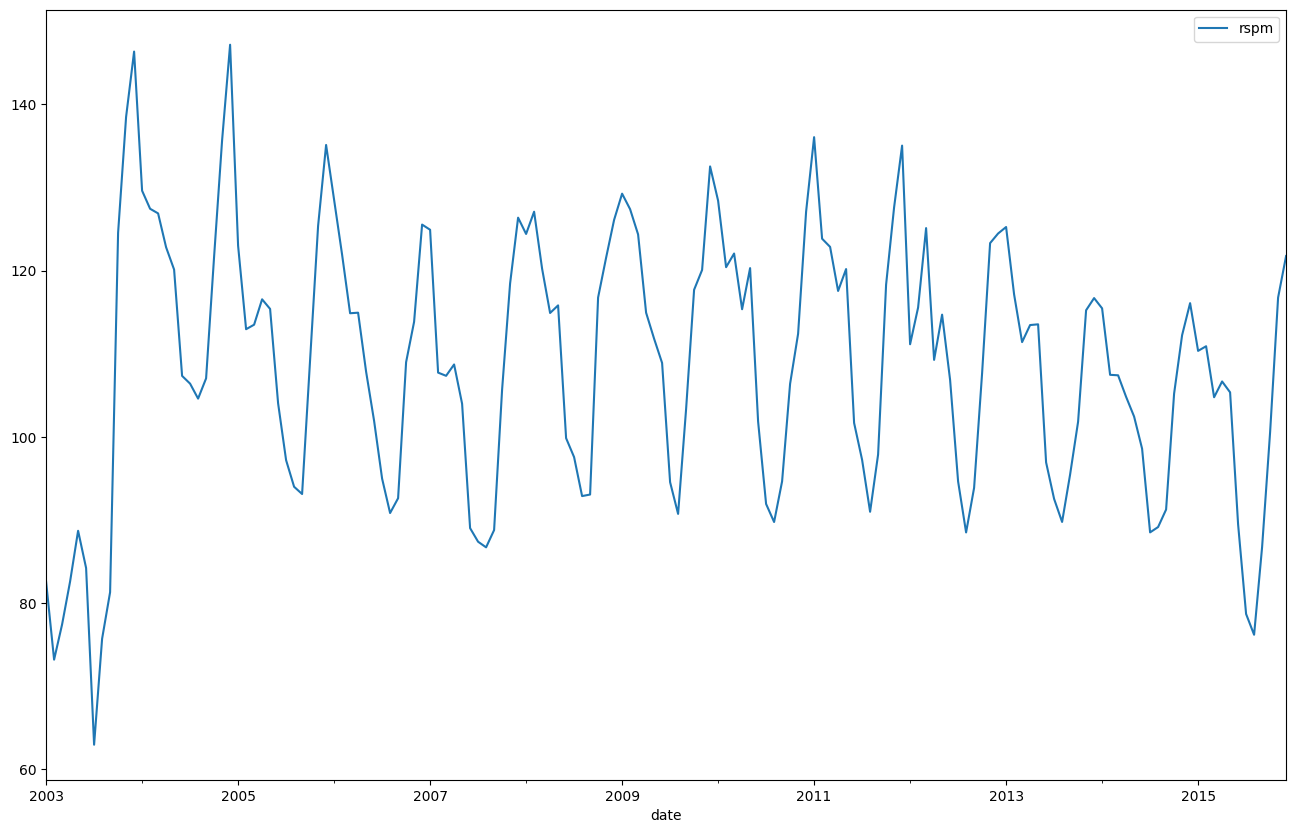

In [41]:
data_rspm = data[["date", "rspm"]].set_index("date").dropna()
data_rspm = data_rspm.resample("M").mean().interpolate()
data_rspm.plot(figsize = (16, 10))

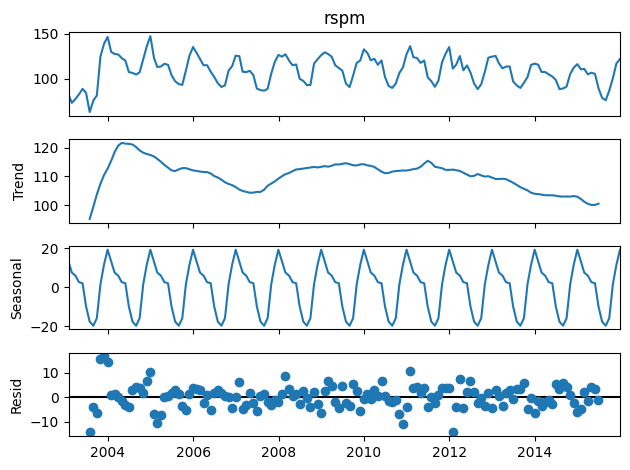

In [42]:
sm.tsa.seasonal_decompose(data_rspm["rspm"], period = 12).plot()
plt.show()

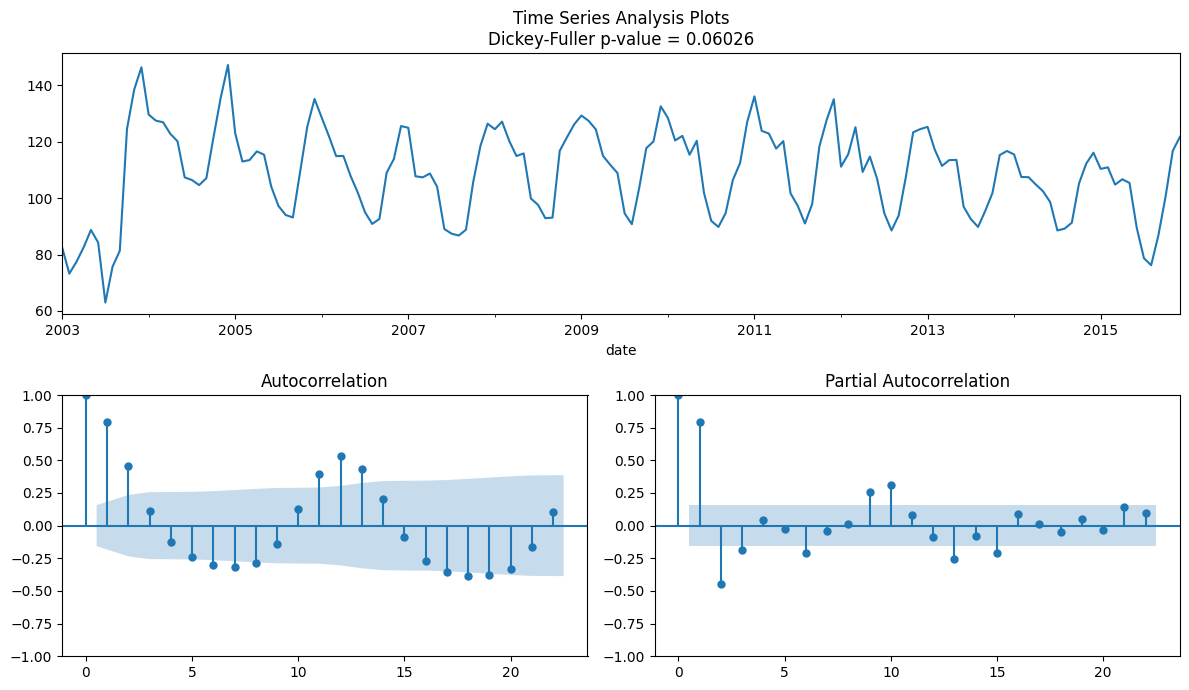

In [43]:
tsplot(data_rspm["rspm"])

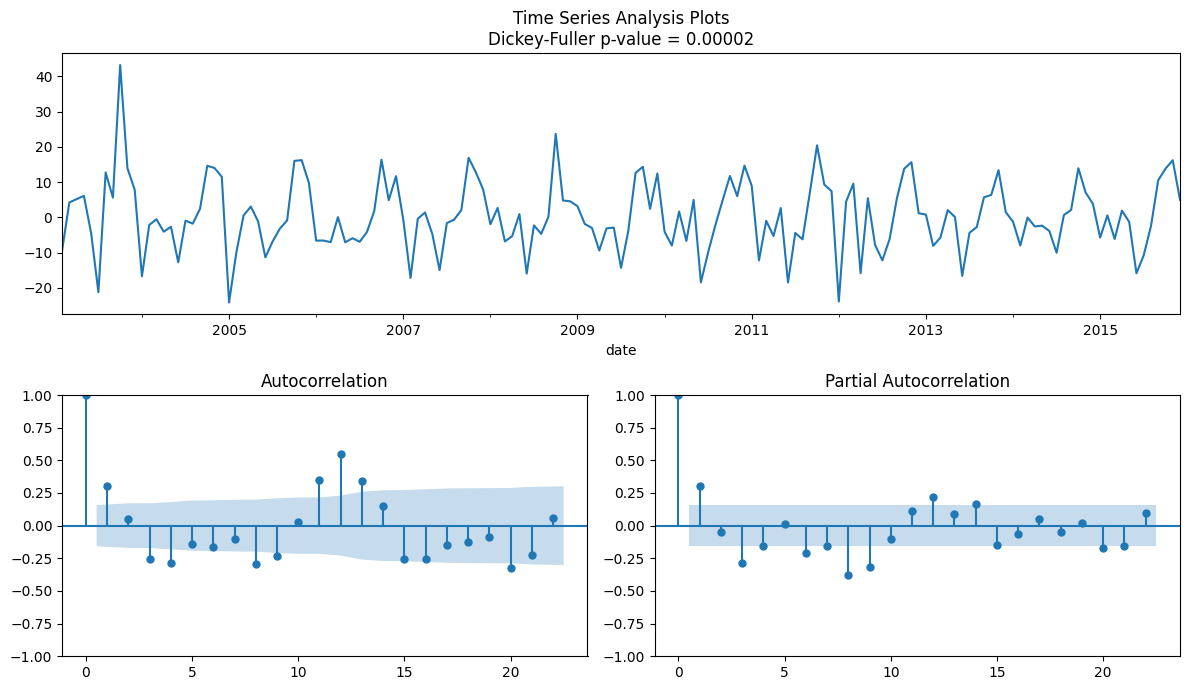

In [44]:
tsplot(data_rspm["rspm"].diff().dropna())

In [45]:
train = data_rspm["rspm"][:-20]
test = data_rspm["rspm"][-20:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(2, 1, 2), enforce_stationarity = False, enforce_invertibility = False)
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\2077770758.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 104.370316, expected = 102.451861
predicted = 99.080503, expected = 98.582055
predicted = 95.609045, expected = 88.519800
predicted = 87.499919, expected = 89.160633
predicted = 90.479898, expected = 91.266646
predicted = 93.686654, expected = 105.200787
predicted = 108.310928, expected = 112.237551
predicted = 110.640688, expected = 116.094381
predicted = 116.303047, expected = 110.351636
predicted = 104.812000, expected = 110.908604
predicted = 108.017431, expected = 104.774078
predicted = 104.517413, expected = 106.672456
predicted = 109.074331, expected = 105.363688
predicted = 107.363601, expected = 89.486423
predicted = 81.115672, expected = 78.701693
predicted = 73.388677, expected = 76.205006
predicted = 79.406422, expected = 86.748880
predicted = 95.942399, expected = 100.552717
predicted = 107.187344, expected = 116.763638
predicted = 115.696483, expected = 121.764120


In [46]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 6.6101


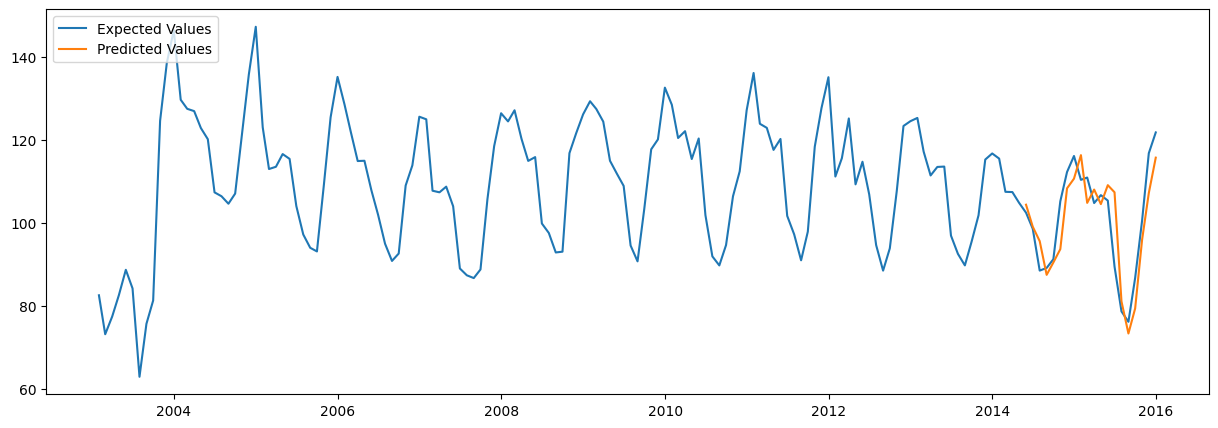

In [47]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data_rspm['rspm'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [48]:
future = [data_rspm.index[-1] + DateOffset(months = x) for x in range(0, 49)]
df = pd.DataFrame(index = future[1:], columns = data_rspm.columns)
forecast = pd.concat([data_rspm, df])
forecast['ARIMA_Forecast'] = np.nan
forecast

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\425224755.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([data_rspm, df])


,rspm,ARIMA_Forecast
2003-01-31,82.582857,NaN
2003-02-28,73.211538,NaN
2003-03-31,77.450617,NaN
2003-04-30,82.613793,NaN
2003-05-31,88.711656,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [49]:
history = [x for x in data_rspm["rspm"]]
f = []

for t in range(len(forecast) - len(data_rspm)):
    model = ARIMA(history, order=(2, 1, 2), enforce_stationarity = False, enforce_invertibility = False)
    model_fit = model.fit()
    output = model_fit.forecast()[0]
    history.append(output)
    f.append(output) 

for i in range(len(f)):
    forecast.iloc[156 + i, 1] = f[i]

<Axes: >

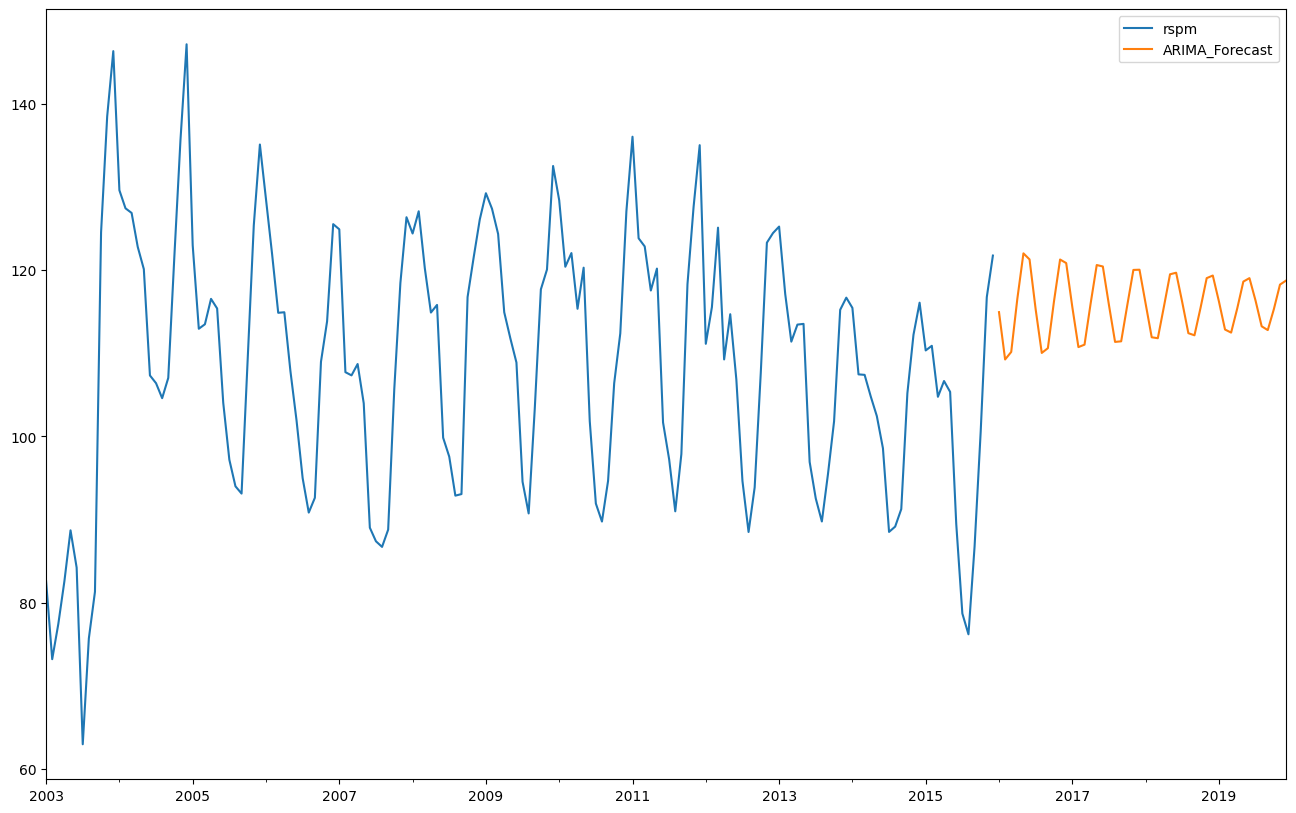

In [50]:
forecast[["rspm", "ARIMA_Forecast"]].plot(figsize = (16, 10))

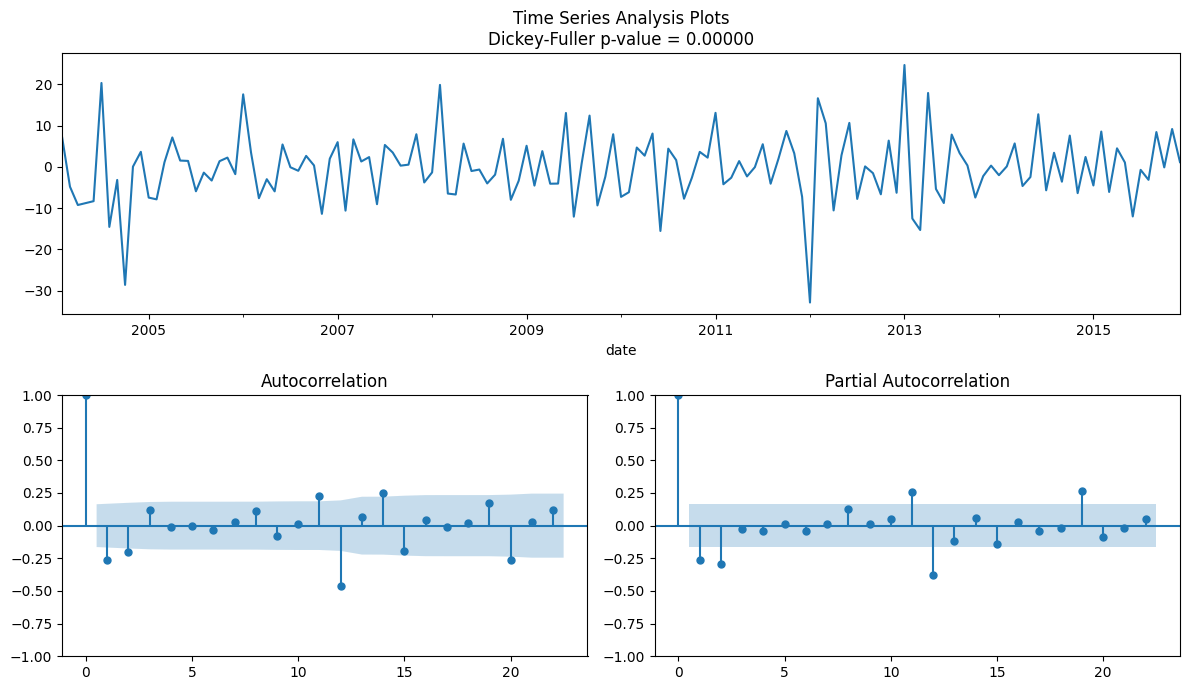

In [51]:
tsplot(data_rspm.diff().diff(12).dropna())

In [52]:
model = sm.tsa.statespace.SARIMAX(data_rspm["rspm"], order = (2, 1, 2), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 rspm   No. Observations:                  156
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -465.451
Date:                              Wed, 30 Apr 2025   AIC                            944.901
Time:                                      17:17:48   BIC                            965.641
Sample:                                  01-31-2003   HQIC                           953.329
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5355      0.090     17.104      0.000       1.360       1.711
ar.L2         -0.69

c:\Users\18215\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
train = data_rspm["rspm"][:-20]
test = data_rspm["rspm"][-20:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history, order = (2, 1, 2), seasonal_order = (1, 1, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\3068632990.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 105.610925, expected = 102.451861
predicted = 90.486037, expected = 98.582055
predicted = 88.593341, expected = 88.519800
predicted = 81.765738, expected = 89.160633
predicted = 91.433746, expected = 91.266646
predicted = 103.552874, expected = 105.200787
predicted = 115.522959, expected = 112.237551
predicted = 120.921750, expected = 116.094381
predicted = 114.793815, expected = 110.351636
predicted = 107.232250, expected = 110.908604
predicted = 109.652213, expected = 104.774078
predicted = 101.460765, expected = 106.672456
predicted = 105.827735, expected = 105.363688
predicted = 92.102933, expected = 89.486423
predicted = 83.945171, expected = 78.701693
predicted = 78.864437, expected = 76.205006
predicted = 83.014749, expected = 86.748880
predicted = 100.371486, expected = 100.552717
predicted = 109.025177, expected = 116.763638
predicted = 120.445156, expected = 121.764120


In [54]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 4.2924


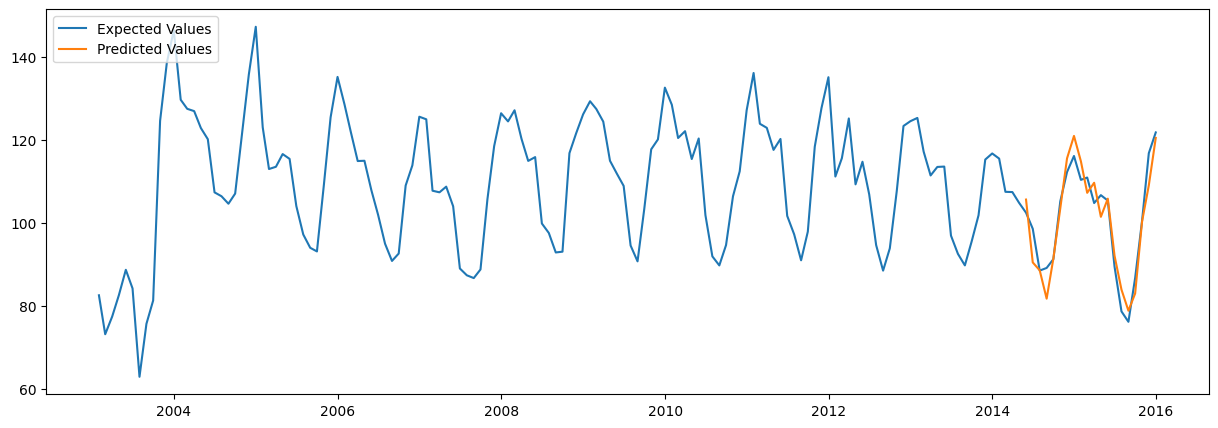

In [55]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data_rspm['rspm'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values')
plt.legend(loc="upper left")
plt.show()

In [56]:
future = [data_rspm.index[-1] + DateOffset(months = x) for x in range(0, 49)]
df = pd.DataFrame(index = future[1:], columns = data_rspm.columns)
forecast = pd.concat([data_rspm, df])
forecast['SARIMA_Forecast'] = np.nan
forecast

C:\Users\18215\AppData\Local\Temp\ipykernel_29640\4178558997.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([data_rspm, df])


,rspm,SARIMA_Forecast
2003-01-31,82.582857,NaN
2003-02-28,73.211538,NaN
2003-03-31,77.450617,NaN
2003-04-30,82.613793,NaN
2003-05-31,88.711656,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [57]:
history = [x for x in data_rspm["rspm"]]
f = []

for t in range(len(forecast) - len(data_rspm)):

    model = sm.tsa.statespace.SARIMAX(history, order = (2, 1, 2), seasonal_order = (1, 1, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
    model_fit = model.fit()

    output = model_fit.forecast()[0]
    history.append(output)
    f.append(output) 

for i in range(len(f)):
    forecast.iloc[156 + i, 1] = f[i]

c:\Users\18215\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

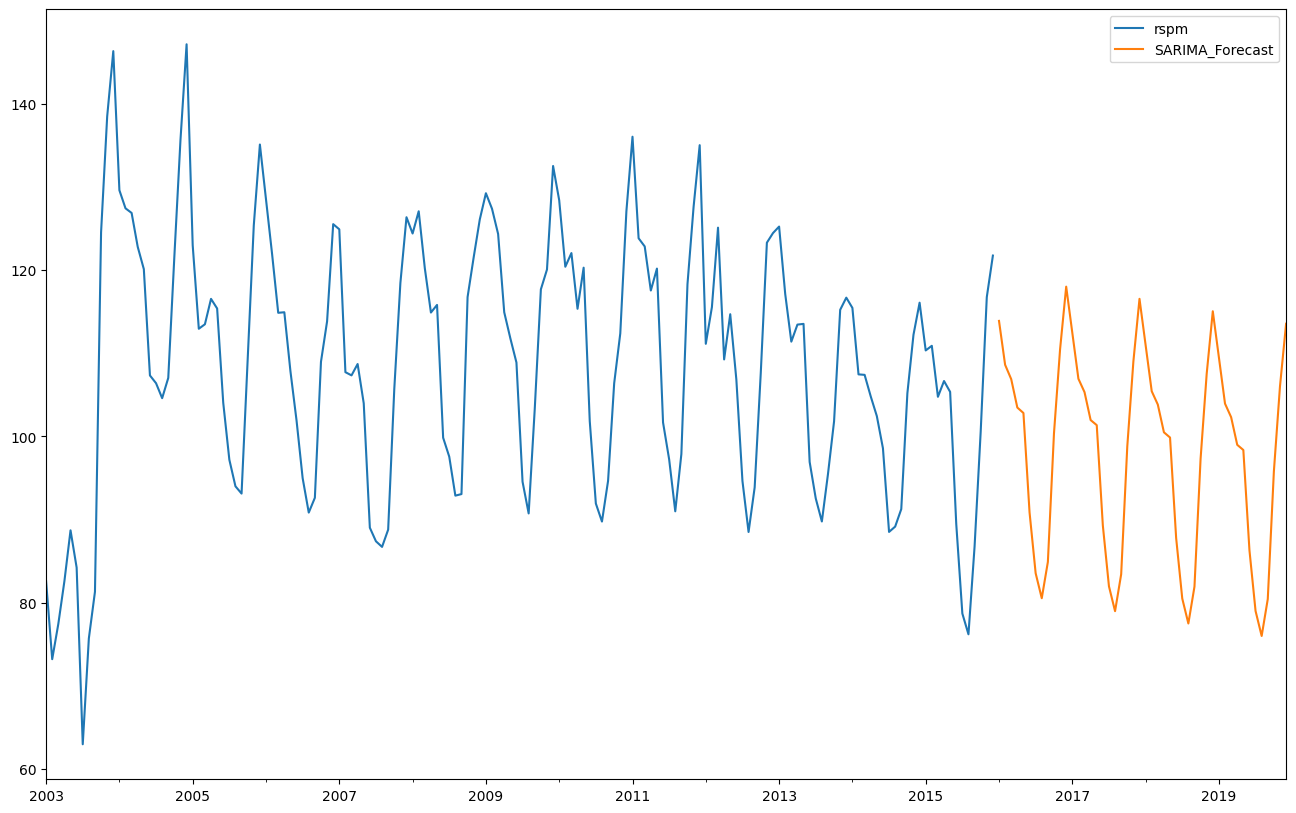

In [58]:
forecast[["rspm", "SARIMA_Forecast"]].plot(figsize = (16, 10))